In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy.optimize as spy
%matplotlib inline

In [2]:
num_agents = 500; # number of members partaking in transactions
m0 = 1000; # average money per agent, will also be the starting money
beta = 1/m0 # equation variable
money_tot = m0 * num_agents # total money, will be conserved

In [3]:
# transaction quantification value epsilon
def epsilon():
    return np.round(np.random.uniform(0,1),2)

# used to asign transactions between two random agents
def rand_agent():
    return np.int(np.round(np.random.uniform(0,num_agents - 1),0))

In [4]:
# vector container for all agents with starting money, m0
def agent():
    agents = np.zeros(num_agents);
    agents += m0;
    return agents

In [5]:
def transactions(agents,num,gamma):
    i = 0
    while i < num:
        #exchange quantifier and agent identification
        ep = epsilon()
        one = rand_agent()
        two = rand_agent()
        if one == two:
            two = rand_agent()
        
        #perform transaction
        Mone = agents[one]
        Mtwo = agents[two]
        Msum = Mone + Mtwo
        dM = np.round((1 - gamma) * (ep * Mtwo - (1 - ep) * Mone),2)
        
        Moneprime = Mone + dM
        Mtwoprime= Mtwo - dM
        
        #update agent wealth
        agents[one] = Moneprime
        agents[two] = Mtwoprime
        
        i += 1

In [40]:
def history(vector, num,gamma):
    wealth = vector
    #plt.figure('histogram')
    n, bins, patches = plt.hist(vector, 50, alpha=0, normed=1)
    n = np.append(n,0)
    #plt.title('Wealth Distribution after: ' + str(num) + ' transactions')
    plt.xlabel('Wealth [Dollars]')
    plt.ylabel('Occurance')
    y = mlab.normpdf(bins,np.average(vector),np.std(vector));
    #plt.plot(bins,y,'r--',label='lambda = '+str(gamma),lw=2)
    #plt.legend()
    #plt.show()
    return n, bins, y

In [36]:
def repitition(num,gamma):
    rep = 0
    loss = 0
    check = 0
    vector = agent()
    # to check for equilibrium we calculate the new mean after successive simulations and wait for delW_avg = 0.05 %
    while check < 1:
        # to ensure the conservation of wealth we introduce an if statement for money loss
        if np.abs(loss) < 1:
            std_old = np.std(vector)
            transactions(vector,num,gamma)
            money_after = sum(vector)
            loss = money_tot - money_after
            rep += 1
            agents = vector
            std_new = np.std(vector)
            if np.abs((std_new - std_old)/std_old) < 0.05:
                check = 1
                print('Equilibrium: established')
                print('std of wealth: ', std_new)
                print('rep count: ', rep)
            else:
                pass
        else:
            check = 1
            print('money is not being conserved')
            print('net difference: ', loss)
            print('failed with rep count: ', rep)

    return agents

C:\Users\samme\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: RuntimeWarning: divide by zero encountered in double_scalars


Equilibrium: established
std of wealth:  701.407517326
rep count:  2


ValueError: too many values to unpack (expected 2)

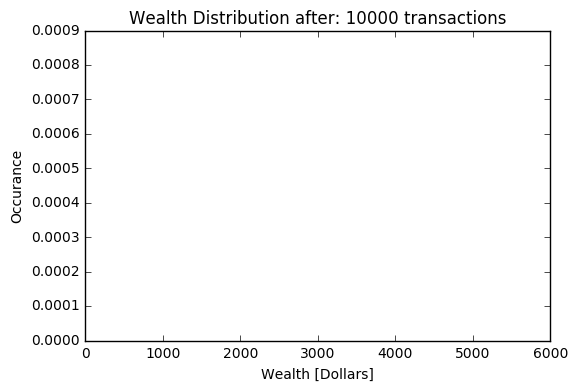

In [37]:
num = 10**4
gamma = 0.25
agents = repitition(num,gamma)
n, bins = history(agents,num,gamma)

In [ ]:
num = 10**4
gamma = 0.5
agents = repitition(num,gamma)
n, bins = history(agents,num,gamma)

C:\Users\samme\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: RuntimeWarning: divide by zero encountered in double_scalars


Equilibrium: established
std of wealth:  189.12060096
rep count:  2


ValueError: too many values to unpack (expected 2)

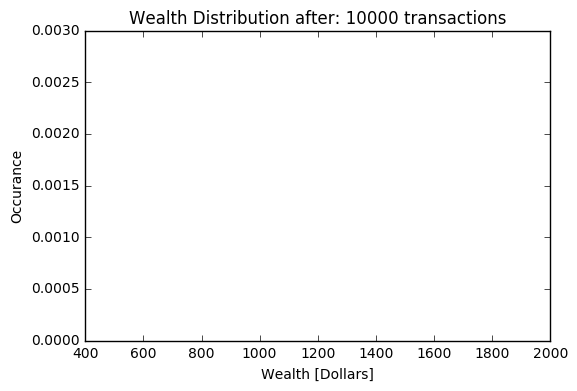

In [38]:
num = 10**4
gamma = 0.9
agents = repitition(num,gamma)
n, bins = history(agents,num,gamma)

C:\Users\samme\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: RuntimeWarning: divide by zero encountered in double_scalars


Equilibrium: established
std of wealth:  691.837653192
rep count:  2
Equilibrium: established
std of wealth:  505.32371868
rep count:  3
Equilibrium: established
std of wealth:  321.796711143
rep count:  2
Equilibrium: established
std of wealth:  195.144621123
rep count:  2


<function matplotlib.pyplot.show>

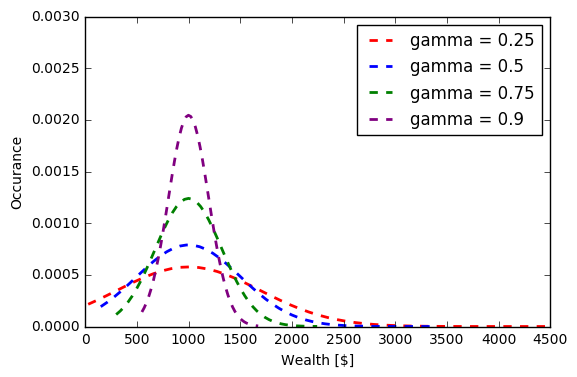

In [41]:
num = 10**4
gamma = [0.25,0.5,0.75,0.9]
color = ['red','blue','green','purple']
fig = plt.figure('multi-gamma')
for i in np.arange(len(gamma)):
    value = gamma[i]
    agents = repitition(num,value)
    data = history(agents,num,value)
    plt.plot(data[1],data[2],'r--',lw=2,label='gamma = '+str(value),color=color[i])
    plt.hold(True)
plt.xlabel('Wealth [$]')
plt.ylabel('Occurance')
plt.legend()
plt.show